In [1]:
import os
import matplotlib.pylab as plt
#import cv2
from natsort import natsorted
import numpy as np
import pandas as pd

In [2]:
DIRECTORIO_BASE = os.getcwd()
DIRECTORIO_BASE

'c:\\Users\\56967\\OneDrive\\Escritorio\\Tarea intro imagenes\\Face Mask Datasets-20220524T053858Z-001'

In [36]:
from skimage import io
imagen = io.imread(f'{DIRECTORIO_BASE}\\Face Mask Datasets\\00000_C\\00257_Mask.jpg')
imagen = resize(imagen, (224,224))

# HOG

(224, 224, 3)


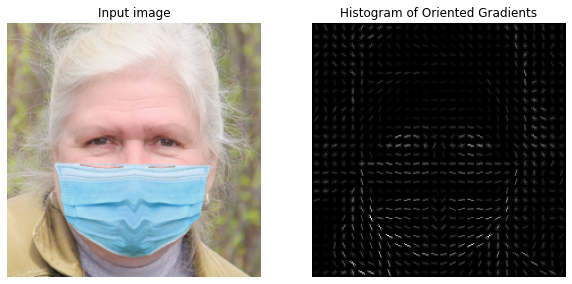

In [37]:
from skimage.transform import resize
from skimage.feature import hog
from skimage import data, exposure

def HOG(img):
  fd, hog_image = hog(img, orientations=8, pixels_per_cell=(8, 8), 
                    cells_per_block=(1, 1), visualize=True, multichannel=True)
  return fd
  
print(imagen.shape)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10), sharex=True, sharey=True)
ax1.axis('off')
ax1.imshow(imagen, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
fd, hog_image = hog(imagen, orientations=8, pixels_per_cell=(8, 8), 
                  cells_per_block=(1, 1), visualize=True, multichannel=True)
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

# LBP

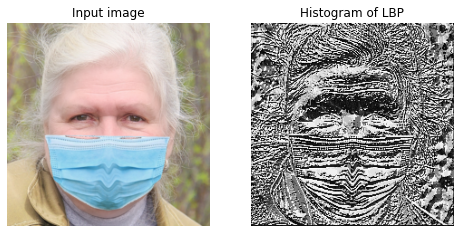

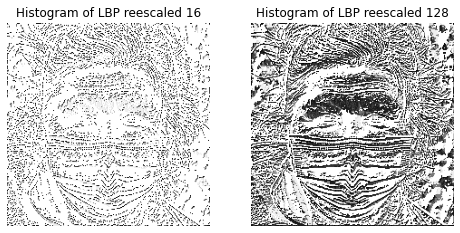

In [38]:
from skimage.feature import local_binary_pattern
from skimage import io
from skimage.color import rgb2gray

imagen = io.imread(f'{DIRECTORIO_BASE}\\Face Mask Datasets\\00000_C\\00257_Mask.jpg')

# settings for LBP
radius = 1
n_points = 8 * radius



image_escala_grises = rgb2gray(resize(imagen, (224,224)))

lbp = local_binary_pattern(image_escala_grises, n_points, radius)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)
ax1.axis('off')
ax1.imshow(resize(imagen, (224,224)), cmap=plt.cm.gray)
ax1.set_title('Input image')

ax2.axis('off')
ax2.imshow(lbp, cmap=plt.cm.gray)
ax2.set_title('Histogram of LBP')
plt.show()



fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)
ax1.axis('off')
ax1.imshow(exposure.rescale_intensity(lbp, in_range=(0, 16)), cmap=plt.cm.gray)
ax1.set_title('Histogram of LBP reescaled 16')

# Rescale histogram for better display

ax2.axis('off')
ax2.imshow(exposure.rescale_intensity(lbp, in_range=(0, 128)), cmap=plt.cm.gray)
ax2.set_title('Histogram of LBP reescaled 128')
plt.show()

Cargar imagenes

In [23]:
import cv2
def load_images_from_folder(folder):
    images = []
    for filename in natsorted(os.listdir(folder)):
        img = cv2.imread(os.path.join(folder,filename))
        #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        #img = img.astype(float)

        if img is not None:
            images.append(img)
    return images
''
# creamos carpetas para cada secuencia para mayor orden

In [49]:
from skimage.color import gray2rgb,rgb2gray
def load_images_from_folder_v2(folder):
    images = []
    for filename in natsorted(os.listdir(folder)):
        path = os.path.join(folder,filename)
        if path[-4:] == '.jpg':
            img = io.imread(path)
            img=resize(img, (224,224))
            img_gray = rgb2gray(img)
            norm_gray = img_gray/np.max(img_gray)
            #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            #img = img.astype(float)
        #if img is not None:
            images.append(gray2rgb(norm_gray))
    return images

In [50]:
dataset_correct_v2 =  load_images_from_folder_v2(f'{DIRECTORIO_BASE}\\Face Mask Datasets\\00000_C')

In [51]:
dataset_wrong_v2 = load_images_from_folder_v2(f'{DIRECTORIO_BASE}\\Face Mask Datasets\\10000_W')

In [94]:
from skimage.color import gray2rgb,rgb2gray
def load_images_from_folder_v2(folder):
    images = []
    for filename in natsorted(os.listdir(folder)):
        path = os.path.join(folder,filename)
        if path[-4:] == '.png':
            img = io.imread(path)
            img=resize(img, (224,224))
            img_gray = rgb2gray(img)
            norm_gray = img_gray/np.max(img_gray)
            #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            #img = img.astype(float)
        #if img is not None:
            images.append(gray2rgb(norm_gray))
    return images

In [95]:
dataset_no_v2 = load_images_from_folder_v2(f'{DIRECTORIO_BASE}\\Face Mask Datasets\\60000_N')

In [7]:
#dataset_pruebas = load_images_from_folder(f'{DIRECTORIO_BASE}\\Face Mask Datasets\\probar')

In [8]:
#dataset_correct = load_images_from_folder(f'{DIRECTORIO_BASE}\\Face Mask Datasets\\00000_C')

In [9]:
#dataset_wrong = load_images_from_folder(f'{DIRECTORIO_BASE}\\Face Mask Datasets\\10000_W')

In [10]:
#dataset_no = load_images_from_folder(f'{DIRECTORIO_BASE}\\Face Mask Datasets\\60000_N')

Extraer caracteristicas

In [53]:
def extractor_hog(dataset):
    caracteristicas = []
    for image in dataset:
        caracteristicas.append(HOG(image))
    return caracteristicas

In [54]:
hog_correct=extractor_hog(dataset_correct_v2)

In [55]:
hog_wrong=extractor_hog(dataset_wrong_v2)

In [96]:
hog_no=extractor_hog(dataset_no_v2)

In [57]:
def extractor_lbp(dataset):
    caracteristicas = []
    for image in dataset:
        LBP=local_binary_pattern(rgb2gray(imagen), 8, 1)
        n_bins = int(lbp.max()+1)
        (hist, _) = np.histogram(LBP.ravel(),bins=n_bins,range=(0,n_bins))
        caracteristicas.append(hist)
    return caracteristicas

In [58]:
lbp_correct = extractor_lbp(dataset_correct_v2)

In [59]:
lbp_wrong = extractor_lbp(dataset_wrong_v2)

In [97]:
lbp_no = extractor_lbp(dataset_no_v2)

# CNNS

In [61]:
import tensorflow

In [62]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
#from tensorflow.keras.applications.resnet50 import preprocess_input


modelo_resnet = ResNet50(weights='imagenet', include_top=True)
model_resnet= tensorflow.keras.Model(inputs=modelo_resnet.input, outputs=modelo_resnet.layers[-2].output)

def features_resnet(array):
    features = []
    for imagen in array:
        x = np.expand_dims(imagen, axis=0)
        x = tensorflow.keras.applications.resnet50.preprocess_input(x)
        features.append(tensorflow.squeeze(model_resnet.predict(x)))
    return features

In [63]:
features_resnet_correc = features_resnet(dataset_correct_v2)

1/1 [==============================] - 0s 142ms/step


In [64]:
features_resnet_wrong = features_resnet(dataset_wrong_v2)

1/1 [==============================] - 0s 134ms/step


In [98]:
features_resnet_no = features_resnet(dataset_no_v2)

1/1 [==============================] - 0s 147ms/step


In [66]:
from tensorflow.keras.preprocessing import image
model_densenet = tensorflow.keras.applications.DenseNet121(weights='imagenet', include_top=True)

model_dn = tensorflow.keras.Model(inputs=model_densenet.input, outputs=model_densenet.layers[-2].output)


In [67]:
def features_densenet(array):
    features = []

    for imagen in array:
        #img = image.load_img(imagen, target_size=(128, 128))
        #x = image.img_to_array(img)
        x = np.expand_dims(imagen, axis=0)
        x = tensorflow.keras.applications.densenet.preprocess_input(x)
        tensorflow.keras.layers.Flatten
        features.append(tensorflow.squeeze(model_densenet.predict(x)))
    return features

#model_densenet = tensorflow.keras.applications.DenseNet121(weights='imagenet', include_top=True)
#densenet = tensorflow.keras.Model(tensorflow.keras.Input(shape=(128,128,3,)), outputs= model_densenet.layers[-2].output)


In [68]:
features_densenet_correct = features_densenet(dataset_correct_v2)

1/1 [==============================] - 0s 114ms/step


In [69]:
features_densenet_wrong = features_densenet(dataset_wrong_v2)

1/1 [==============================] - 0s 114ms/step


In [99]:
features_densenet_no = features_densenet(dataset_no_v2)

1/1 [==============================] - 0s 123ms/step


# Labels

In [71]:
label_c= np.full(len(dataset_correct), 0, dtype=int)
label_w= np.full(len(dataset_wrong), 1, dtype=int)
label_n= np.full(len(dataset_no), 2, dtype=int)
print(f'{label_c.shape},{label_w.shape},{label_n.shape}')
labels = np.concatenate((label_c,label_w,label_n),0)

(1243,),(632,),(1156,)


In [100]:
features_lbp=np.concatenate((lbp_correct, lbp_wrong,lbp_no), axis=0)
features_hog=np.concatenate((hog_correct, hog_wrong,hog_no), axis=0)
features_dense=np.concatenate((features_densenet_correct, features_densenet_wrong,features_densenet_no), axis=0)
features_res=np.concatenate((features_resnet_correc, features_resnet_wrong,features_resnet_no), axis=0)

In [192]:
all_pics=np.concatenate((dataset_correct_v2, dataset_wrong_v2,dataset_no_v2), axis=0)
pics_train, pics_test, y_train_lbp, y_test_lbp = \
            train_test_split(all_pics, labels, test_size=0.3, random_state=70)

In [133]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

0.4065934065934066


[Text(0, 0.5, 'correct'), Text(0, 1.5, 'wrong'), Text(0, 2.5, 'no')]

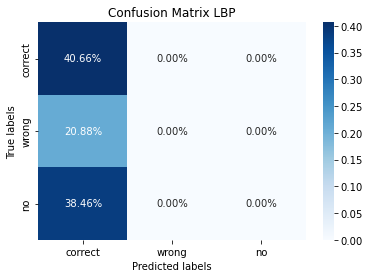

In [150]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import preprocessing


X_train_lbp, X_test_lbp, y_train_lbp, y_test_lbp = \
            train_test_split(features_lbp, labels, test_size=0.3, random_state=70)
            
scaler_lbp = preprocessing.StandardScaler().fit(X_train_lbp)
X_train_lbp_norm = scaler_lbp.transform(X_train_lbp)

clf_lbp = svm.SVC()
clf_lbp.fit(X_train_lbp_norm, y_train_lbp)

X_test_lbp_norm=scaler_lbp.transform(X_test_lbp)
predicciones_lbp = clf_lbp.predict(X_test_lbp_norm)

print(sklearn.metrics.accuracy_score(y_test_lbp, predicciones_lbp))
cf_matrix_lbp = sklearn.metrics.confusion_matrix(y_test_lbp, predicciones_lbp)




ax= plt.subplot()
sns.heatmap(cf_matrix_lbp/np.sum(cf_matrix_lbp), fmt='.2%', cmap='Blues', annot=True)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix LBP'); 
ax.xaxis.set_ticklabels(['correct', 'wrong','no']); ax.yaxis.set_ticklabels(['correct', 'wrong','no'])

0.9593406593406594


[Text(0, 0.5, 'correct'), Text(0, 1.5, 'wrong'), Text(0, 2.5, 'no')]

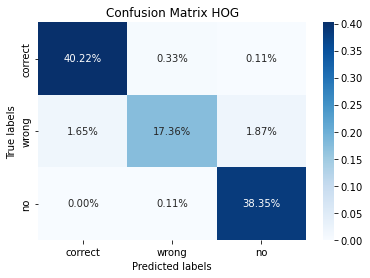

In [153]:
X_train_hog, X_test_hog, y_train_hog, y_test_hog = \
            train_test_split(features_hog, labels, test_size=0.3, random_state=70)
            
scaler_hog = preprocessing.StandardScaler().fit(X_train_hog)
X_train_hog_norm = scaler_hog.transform(X_train_hog)

clf_hog = svm.SVC()
clf_hog.fit(X_train_hog_norm, y_train_hog)

X_test_hog_norm=scaler_hog.transform(X_test_hog)
predicciones_hog = clf_hog.predict(X_test_hog_norm)

print(sklearn.metrics.accuracy_score(y_test_hog, predicciones_hog))
cf_matrix_hog = sklearn.metrics.confusion_matrix(y_test_hog, predicciones_hog)

ax= plt.subplot()

sns.heatmap(cf_matrix_hog/np.sum(cf_matrix_hog), fmt='.2%', cmap='Blues', annot=True,ax=ax)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix HOG'); 
ax.xaxis.set_ticklabels(['correct', 'wrong','no']); ax.yaxis.set_ticklabels(['correct', 'wrong','no'])



0.7747252747252747


[Text(0, 0.5, 'correct'), Text(0, 1.5, 'wrong'), Text(0, 2.5, 'no')]

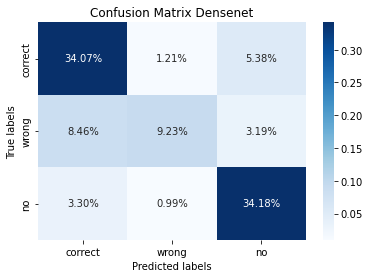

In [151]:
X_train_dense, X_test_dense, y_train_dense, y_test_dense = \
            train_test_split(features_dense, labels, test_size=0.3, random_state=70)
            
scaler_dense = preprocessing.StandardScaler().fit(X_train_dense)
X_train_dense_norm = scaler_dense.transform(X_train_dense)

clf_dense = svm.SVC()
clf_dense.fit(X_train_dense_norm, y_train_dense)

X_test_dense_norm=scaler_dense.transform(X_test_dense)
predicciones_dense = clf_dense.predict(X_test_dense_norm)

print(sklearn.metrics.accuracy_score(y_test_dense, predicciones_dense))
cf_matrix_dense = sklearn.metrics.confusion_matrix(y_test_dense, predicciones_dense)



ax= plt.subplot()
sns.heatmap(cf_matrix_dense/np.sum(cf_matrix_dense), fmt='.2%', cmap='Blues', annot=True,ax=ax)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix Densenet'); 
ax.xaxis.set_ticklabels(['correct', 'wrong','no']); ax.yaxis.set_ticklabels(['correct', 'wrong','no'])

0.7395604395604396


[Text(0, 0.5, 'correct'), Text(0, 1.5, 'wrong'), Text(0, 2.5, 'no')]

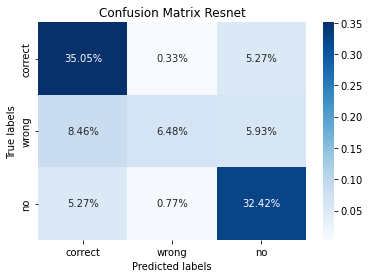

In [152]:
X_train_res, X_test_res, y_train_res, y_test_res = \
            train_test_split(features_res, labels, test_size=0.3, random_state=70)
            
scaler_res = preprocessing.StandardScaler().fit(X_train_res)
X_train_res_norm = scaler_res.transform(X_train_res)

clf_res = svm.SVC()
clf_res.fit(X_train_res_norm, y_train_res)

X_test_res_norm=scaler_res.transform(X_test_res)
predicciones_res = clf_res.predict(X_test_res_norm)

print(sklearn.metrics.accuracy_score(y_test_res, predicciones_res))
cf_matrix_res = sklearn.metrics.confusion_matrix(y_test_res, predicciones_res)

ax= plt.subplot()
sns.heatmap(cf_matrix_res/np.sum(cf_matrix_res), fmt='.2%', cmap='Blues', annot=True,ax=ax)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix Resnet'); 
ax.xaxis.set_ticklabels(['correct', 'wrong','no']); ax.yaxis.set_ticklabels(['correct', 'wrong','no'])

In [121]:
from skimage.color import gray2rgb,rgb2gray
def load_images_from_folder_v3(folder):
    images = []
    for filename in natsorted(os.listdir(folder)):
        path = os.path.join(folder,filename)
        img = io.imread(path)
        img=resize(img, (224,224))
        img_gray = rgb2gray(img)
        norm_gray = img_gray/np.max(img_gray)
            #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            #img = img.astype(float)
        #if img is not None:
        images.append(gray2rgb(norm_gray))
    return images

dataset_vincko =  load_images_from_folder_v3(f'{DIRECTORIO_BASE}\\Face Mask Datasets\\Fotos')

In [122]:
hog_fotos=extractor_hog(dataset_vincko)

In [123]:
label_fotos = np.array([0,1,2])

In [124]:
X_test_fotos=scaler_hog.transform(hog_fotos)
predicciones_hog = clf_hog.predict(X_test_fotos)

print(sklearn.metrics.accuracy_score(label_fotos, predicciones_hog))
print(sklearn.metrics.confusion_matrix(label_fotos, predicciones_hog))

1.0
[[1 0 0]
 [0 1 0]
 [0 0 1]]


In [125]:
import seaborn as sns

In [130]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(label_fotos, predicciones_hog)
print(cf_matrix)

[[1 0 0]
 [0 1 0]
 [0 0 1]]


<AxesSubplot:>

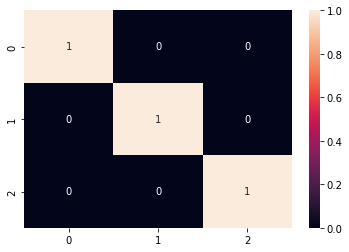

In [131]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

In [161]:
def buscafalsos(predictions,labels):
    lista=[]
    for i in range(len(predictions)):
        if predictions[i] != labels[i]:
            lista.append(i)
    return lista

In [177]:
def buscaverdaderos(predictions,labels):
    lista=[]
    for i in range(len(predictions)):
        if predictions[i] == labels[i]:
            lista.append(i)
    return lista

In [179]:
pos_falsos_hog=buscafalsos(y_test_hog, predicciones_hog)
pos_falsos_lbp=buscafalsos(y_test_lbp, predicciones_lbp)
pos_falsos_resnet=buscafalsos(y_test_res, predicciones_res)
pos_falsos_densenet=buscafalsos(y_test_dense, predicciones_dense)

pos_verdaderos_hog=buscaverdaderos(y_test_hog, predicciones_hog)
pos_verdaderos_lbp=buscaverdaderos(y_test_lbp, predicciones_lbp)
pos_verdaderos_resnet=buscaverdaderos(y_test_res, predicciones_res)
pos_verdaderos_densenet=buscaverdaderos(y_test_dense, predicciones_dense)

In [173]:
label_dic = {0:'Correct',1:'Wrong',2:'No mask'}

In [181]:
print('Prediccion Correcta hog')
print(f'Label= {label_dic[y_test_hog[pos_verdaderos_hog[0]]]}, Prediccion= {label_dic[predicciones_hog[pos_verdaderos_hog[0]]]}')

print('Prediccion Incorrecta hog')
print(f'Label= {label_dic[y_test_hog[pos_falsos_hog[0]]]}, Prediccion= {label_dic[predicciones_hog[pos_falsos_hog[0]]]}')

Prediccion Correcta hog
Label= No mask, Prediccion= No mask
Prediccion Incorrecta hog
Label= Wrong, Prediccion= No mask


In [211]:
print('Prediccion Correcta lbp')
print(f'Label= {label_dic[y_test_lbp[pos_verdaderos_lbp[0]]]}, Prediccion= {label_dic[predicciones_lbp[pos_verdaderos_lbp[0]]]}')

print('Prediccion Incorrecta lbp')
print(f'Label= {label_dic[y_test_lbp[pos_falsos_lbp[0]]]}, Prediccion= {label_dic[predicciones_lbp[pos_falsos_lbp[0]]]}')


Prediccion Correcta lbp
Label= Correct, Prediccion= Correct
Prediccion Incorrecta lbp
Label= No mask, Prediccion= Correct
